In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df=pd.read_csv('madrid2018.csv')


FileNotFoundError: [Errno 2] File b'madrid2018.csv' does not exist: b'madrid2018.csv'

In [ ]:
df.head()


In [ ]:
df.tail()


In [7]:
  
df = pd.read_csv('madrid2018.csv', parse_dates = True , index_col = ['date'])

for column in df.columns :
     if column != "NO_2" and column !="date" :
        df.drop(column, inplace=True, axis=1)

In [8]:
df.head()


,NO_2
date,
2018-03-01 01:00:00,29.0
2018-03-01 01:00:00,40.0
2018-03-01 01:00:00,41.0
2018-03-01 01:00:00,35.0
2018-03-01 01:00:00,27.0


In [9]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["NO_2"], inplace=True)
df.columns=["NO2"]
df.head()

,NO2
date,
2018-03-01 01:00:00,29.0
2018-03-01 01:00:00,40.0
2018-03-01 01:00:00,41.0
2018-03-01 01:00:00,35.0
2018-03-01 01:00:00,27.0


In [10]:
df.describe()


,NO2
count,68826.000000
mean,38.632203
std,28.491190
min,1.000000
25%,16.000000
50%,32.000000
75%,55.000000
max,276.000000


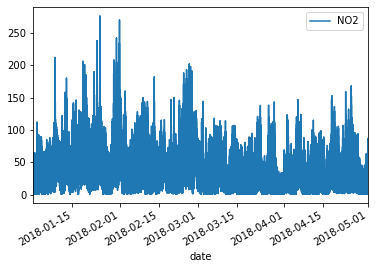

In [11]:
df.plot()


In [ ]:
test_result=adfuller(df['NO2'])
def adfuller_test(NO):
    result=adfuller(NO)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
 

In [ ]:
adfuller_test(df)


In [ ]:
df['World First Difference'] = df['World'] - df['World'].shift(1)


In [ ]:
df['World'].shift(1)


In [ ]:
df['Seasonal First Difference']=df['World']-df['World'].shift(12)
 


In [ ]:
df.head(14)


In [ ]:

adfuller_test(df['Seasonal First Difference'].dropna())


In [ ]:
df['Seasonal First Difference'].plot()


In [ ]:
autocorrelation_plot(df['World'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
model=ARIMA(df['World'],order=(1,1,1))
model_fit=model.fit()

In [ ]:
model_fit.summary()


In [ ]:

df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['World','forecast']].plot(figsize=(12,8))

In [211]:
import statsmodels.api as sm

In [212]:
model=sm.tsa.statespace.SARIMAX(df['World'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


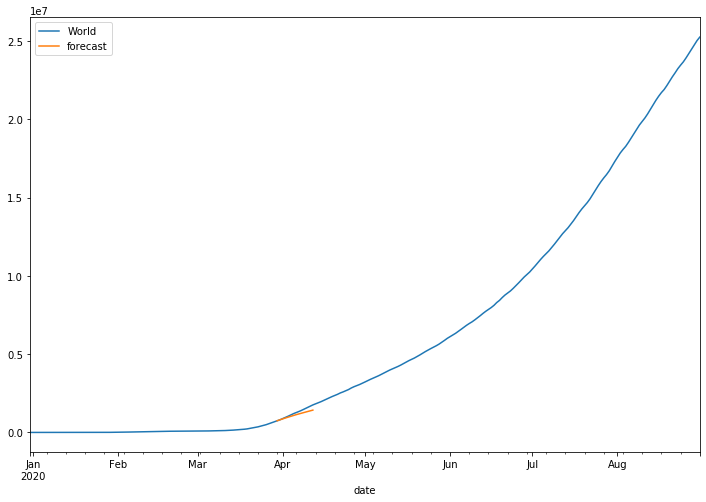

In [213]:

df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['World','forecast']].plot(figsize=(12,8))

In [214]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [215]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [216]:
future_datest_df.tail()


,World,World First Difference,Seasonal First Difference,forecast
2022-03-31,NaN,NaN,NaN,NaN
2022-04-30,NaN,NaN,NaN,NaN
2022-05-31,NaN,NaN,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN
2022-07-31,NaN,NaN,NaN,NaN


In [217]:
future_df=pd.concat([df,future_datest_df])


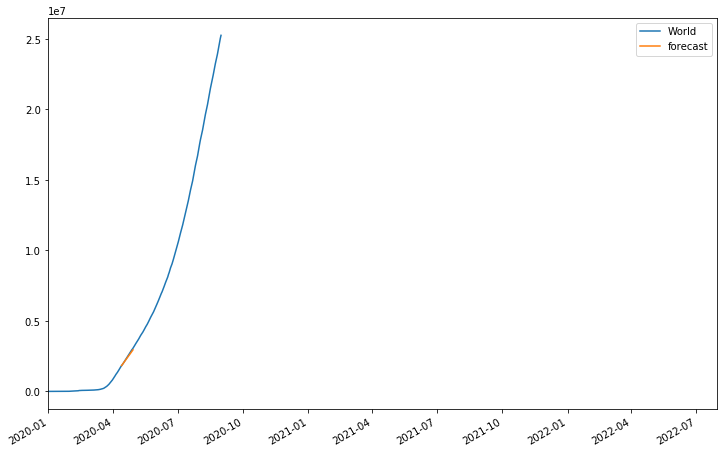

In [218]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['World', 'forecast']].plot(figsize=(12, 8))